### Summary

The California Department of Water Resources large water quality dataset contains current and historical data on different chemical and physical paramterers in different water sources that are regulated across the state. Two of key attributes in this dataset is the parameter and the result. The parameter attribute contains the chemical analyte or physical parameter that was measured. In addition, the result attribute is measured result of the constituent. These key attributes will have an impact on the quality of water running thorugh California.


### Plan for Data Exploration

1. First, explore the dataset's structure, inclduing the number of rows, features, data types and any missing values.
2. Second, perform basic statistical analysis such as caclulating descriptive staticis (mean, median) for numerical features and value counts for categorical features to indetify potential issues like outlier.
3. Third, create data visualizations such as scatter plots and box plots to visually inspect the distributions and relationships between variables. 

### Data Cleaning and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
lab_results = pd.read_csv('data/CAWaterQualityLabResults.csv', nrows=500000)

In [3]:
lab_results.tail(10)

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
499990,3069,TAYLOR SLU NR PIPER,TAYLOR SLU NR PIPER SLU,B9D80261399,Surface Water,38.0424,-121.6663,"Public, Review Status Unknown",Contra Costa,WDIS_0906607,07/08/1969 12:40,NaN,Feet,pH,7.8,0.1,pH Units,EPA 150.1
499991,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Conductance,162,1.0,uS/cm,EPA 120.1
499992,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Boron,.1,0.1,mg/L,"Std Method 4500-B, C"
499993,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Calcium,11,1.0,mg/L,EPA 215.2
499994,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Chloride,16,0.1,mg/L,"Std Method 4500-Cl, B"
499995,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Magnesium,5.2,0.1,mg/L,"Std Method 3500-Mg, E"
499996,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Nitrate,1.6,0.1,mg/L,EPA 352.1 (DWR Modified)
499997,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Potassium,1.2,0.1,mg/L,"Std Method 3500-K, D"
499998,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Sodium,13,1.0,mg/L,"Std Method 3500-Na, D"
499999,3070,SAN JOAQUIN R A JERS,SAN JOAQUIN R A JERSEY ISL,B9D80261415,Surface Water,38.0435,-121.6933,"Public, Review Status Unknown",Contra Costa,WDIS_0906609,07/10/1969 10:30,NaN,Feet,Dissolved Sulfate,15,1.0,mg/L,EPA 375.3


In [4]:
lab_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   station_id          500000 non-null  int64  
 1   station_name        500000 non-null  object 
 2   full_station_name   500000 non-null  object 
 3   station_number      500000 non-null  object 
 4   station_type        500000 non-null  object 
 5   latitude            489562 non-null  float64
 6   longitude           489562 non-null  float64
 7   status              500000 non-null  object 
 8   county_name         500000 non-null  object 
 9   sample_code         500000 non-null  object 
 10  sample_date         500000 non-null  object 
 11  sample_depth        356266 non-null  float64
 12  sample_depth_units  500000 non-null  object 
 13  parameter           500000 non-null  object 
 14  result              494386 non-null  object 
 15  reporting_limit     498473 non-nul

In [5]:
# Removing rows with missing values
lab_results.dropna(subset=['sample_depth', 'result'], inplace=True)

In [6]:
lab_results['result'] = lab_results['result'].apply(pd.to_numeric, errors='coerce')

In [7]:
lab_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352008 entries, 11670 to 499976
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   station_id          352008 non-null  int64  
 1   station_name        352008 non-null  object 
 2   full_station_name   352008 non-null  object 
 3   station_number      352008 non-null  object 
 4   station_type        352008 non-null  object 
 5   latitude            343220 non-null  float64
 6   longitude           343220 non-null  float64
 7   status              352008 non-null  object 
 8   county_name         352008 non-null  object 
 9   sample_code         352008 non-null  object 
 10  sample_date         352008 non-null  object 
 11  sample_depth        352008 non-null  float64
 12  sample_depth_units  352008 non-null  object 
 13  parameter           352008 non-null  object 
 14  result              187347 non-null  float64
 15  reporting_limit     352000 non-null

In [8]:
# Search for 'hello' in the 'column_name' column
lab_results.dropna(subset=['result'], inplace=True)

In [9]:
lab_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187347 entries, 11670 to 499976
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   station_id          187347 non-null  int64  
 1   station_name        187347 non-null  object 
 2   full_station_name   187347 non-null  object 
 3   station_number      187347 non-null  object 
 4   station_type        187347 non-null  object 
 5   latitude            184236 non-null  float64
 6   longitude           184236 non-null  float64
 7   status              187347 non-null  object 
 8   county_name         187347 non-null  object 
 9   sample_code         187347 non-null  object 
 10  sample_date         187347 non-null  object 
 11  sample_depth        187347 non-null  float64
 12  sample_depth_units  187347 non-null  object 
 13  parameter           187347 non-null  object 
 14  result              187347 non-null  float64
 15  reporting_limit     187346 non-null

In [10]:
# Looking for correlations
lab_nums = lab_results.select_dtypes(include=['int64', 'float64'])
#lab_nums
lab_nums_corr = lab_nums.corr()['result'][:-1]
top_features = lab_nums_corr[abs(lab_nums_corr) > 0.5].sort_values(ascending=False)
top_features

result    1.0
Name: result, dtype: float64

/Users/isaiahjenkins/Documents/IBM Cert Coursework/Projects/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


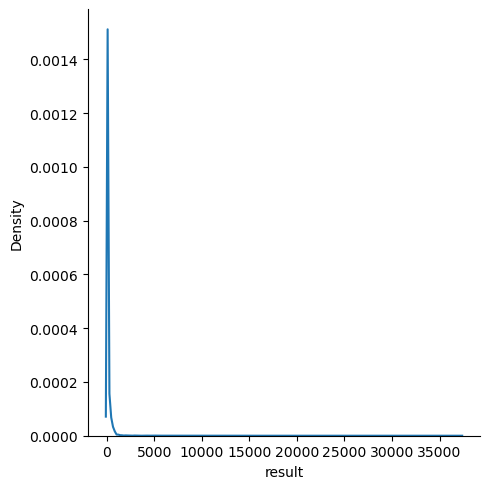

In [11]:
# Log Transformation
results_untransformed = sns.displot(lab_results['result'], kind='kde')


In [12]:
# Highly skewed since it's over 1
print("Skewness: %f" % lab_results['result'].skew())

Skewness: 42.323528


In [13]:
# Unskew the result data for a more normal distribution
log_transformed = np.log(lab_results['result'])

/Users/isaiahjenkins/Documents/IBM Cert Coursework/Projects/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/isaiahjenkins/Documents/IBM Cert Coursework/Projects/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


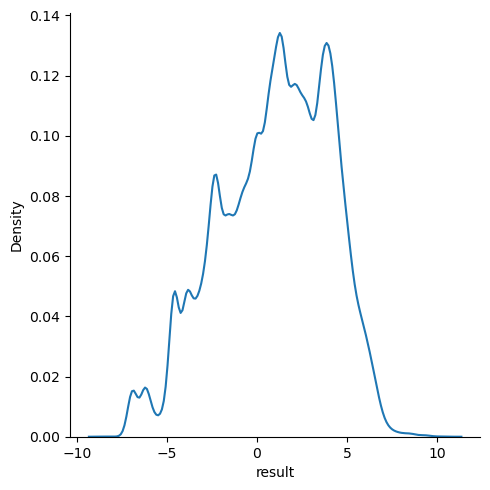

In [14]:
new_displot = sns.displot(log_transformed, kind='kde')

In [15]:
# Handling duplicates
# There are duplicate stations across California with different samples of physical properties found in the water
# First, I will find duplicates of physical properties based the grouping of stationids.

# Searching for duplicates
found_duplicates = lab_results[lab_results.duplicated(['station_id', 'parameter'], keep=False)]
found_duplicates

# I determined that if I keep duplicates of samples per station, I will have a good amount of data to analyze from 
# such as taking the mean or median of different samples.
# Thus, duplicates for parameters would be necessary.

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
11670,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Bromodichloromethane,240.00,10.00,ug/L,DWR THMFP (Original)
11672,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Chloroform,530.00,10.00,ug/L,DWR THMFP (Original)
11673,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Conductance,740.00,1.00,uS/cm@25 °C,EPA 120.1
11674,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Dibromochloromethane,120.00,10.00,ug/L,DWR THMFP (Original)
11675,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Dissolved Bromide,0.46,0.01,mg/L,EPA 300.0 28d Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499972,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906343,12/17/1968 16:10,3.0,Feet,Dissolved Sulfate,13.00,1.00,mg/L,UnkMod Sulfate
499973,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906343,12/17/1968 16:10,3.0,Feet,Total Alkalinity,71.00,1.00,mg/L as CaCO3,UnkMod Alkalinity
499974,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906343,12/17/1968 16:10,3.0,Feet,Total Dissolved Solids,144.00,1.00,mg/L at 180 °C,UnkMod TDS
499975,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906343,12/17/1968 16:10,3.0,Feet,Total Hardness,66.00,1.00,mg/L as CaCO3,UnkMod Hardness


Text(0.5, 1.0, 'Total Missing Values')

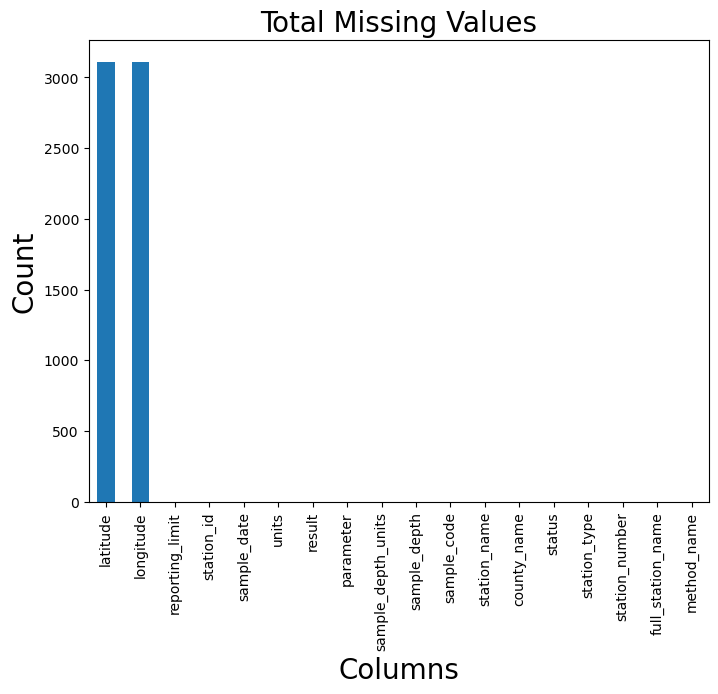

In [16]:
# Handling missing values
total = lab_results.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind='bar', figsize=(8, 6), fontsize=10)

plt.xlabel('Columns', fontsize='20')
plt.ylabel('Count', fontsize='20')
plt.title('Total Missing Values', fontsize='20')

In [17]:
# Feature Scaling 
norm_data = MinMaxScaler().fit_transform(lab_nums)
norm_data

array([[2.23116542e-03, 2.31404282e-01, 3.98954052e-03, 2.67141583e-03,
        6.46268537e-03, 1.00000000e-02],
       [2.23116542e-03, 2.31404282e-01, 3.98954052e-03, 2.67141583e-03,
        1.42393607e-02, 1.00000000e-02],
       [2.23116542e-03, 2.31404282e-01, 3.98954052e-03, 2.67141583e-03,
        1.98707463e-02, 1.00000000e-03],
       ...,
       [9.57524449e-01, 3.09491969e-01, 3.73494134e-03, 6.62906894e-03,
        3.88833767e-03, 1.00000000e-03],
       [9.57524449e-01, 3.09491969e-01, 3.73494134e-03, 6.62906894e-03,
        1.79668016e-03, 1.00000000e-03],
       [9.57524449e-01, 3.09491969e-01, 3.73494134e-03, 6.62906894e-03,
        1.60896731e-04, 1.00000000e-03]])

In [18]:
scaled_data = StandardScaler().fit_transform(lab_nums)
scaled_data

array([[-0.80804612, -0.99420908, -0.06812816, -0.12232912,  0.51734387,
         0.55743035],
       [-0.80804612, -0.99420908, -0.06812816, -0.12232912,  1.32384881,
         0.55743035],
       [-0.80804612, -0.99420908, -0.06812816, -0.12232912,  1.90786962,
        -0.01626009],
       ...,
       [ 1.25728036, -0.72155425, -0.07160203, -0.03073609,  0.25036293,
        -0.01626009],
       [ 1.25728036, -0.72155425, -0.07160203, -0.03073609,  0.03344091,
        -0.01626009],
       [ 1.25728036, -0.72155425, -0.07160203, -0.03073609, -0.13620323,
        -0.01626009]])

<Axes: xlabel='result'>

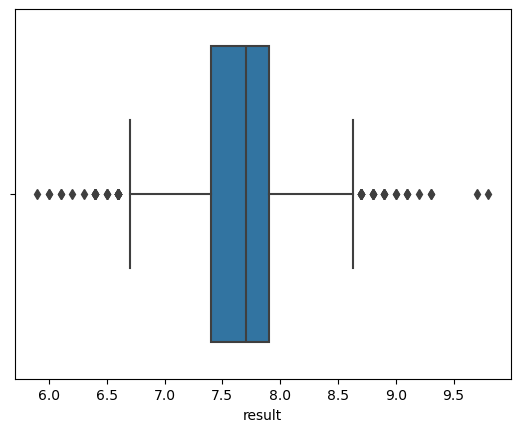

In [19]:
# Handling Outliers
# Finding all the pH of samples and doing a univariate anlaysis on that parameter
sns.boxplot(x=lab_results.loc[lab_results['parameter'] == 'pH', 'result'])

Through further analysis of the the data involving the pH levels, it should not be removed because these samples are from different counties and can have an impact on the quality of our water. THis  means they can have an impact on the quality of our water in different parts of the sate.

In [20]:
# Feauture Engineering
# categorical features - county_name, 
lab_results['county_name'].unique().tolist()

['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa']

In [21]:
# Utlizing One Hot Encoder to make categorical data numerical
lab_results_pH = lab_results[lab_results['parameter'] == 'pH']
new_results_pH = pd.get_dummies(data=lab_results_pH, columns=['county_name'])
new_results_pH

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,sample_code,sample_date,...,reporting_limit,units,method_name,county_name_Alameda,county_name_Alpine,county_name_Amador,county_name_Butte,county_name_Calaveras,county_name_Colusa,county_name_Contra Costa
13384,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0298A0046,02/18/1998 12:34,...,0.1,pH Units,EPA 150.1,True,False,False,False,False,False,False
13419,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0297A0065,02/19/1997 10:35,...,0.1,pH Units,EPA 150.1,True,False,False,False,False,False,False
14126,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0398A0069,03/18/1998 12:34,...,0.1,pH Units,EPA 150.1,True,False,False,False,False,False,False
15464,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0697A0231,06/18/1997 12:00,...,0.1,pH Units,EPA 150.1,True,False,False,False,False,False,False
15902,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0885A0375,08/05/1985 11:10,...,0.1,pH Units,EPA 150.1,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499610,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906413,10/30/1973 10:55,...,0.1,pH Units,Std Method 2120 B,False,False,False,False,False,False,True
499701,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906396,11/15/1972 13:40,...,0.1,pH Units,EPA 150.1,False,False,False,False,False,False,True
499718,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906381,11/16/1971 16:45,...,0.1,pH Units,UnkMod Alkalinity,False,False,False,False,False,False,True
499819,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906414,12/04/1973 14:00,...,0.1,pH Units,Std Method 2120 B,False,False,False,False,False,False,True


In [22]:
# Feature Selection
new_results_pH.columns

Index(['station_id', 'station_name', 'full_station_name', 'station_number',
       'station_type', 'latitude', 'longitude', 'status', 'sample_code',
       'sample_date', 'sample_depth', 'sample_depth_units', 'parameter',
       'result', 'reporting_limit', 'units', 'method_name',
       'county_name_Alameda', 'county_name_Alpine', 'county_name_Amador',
       'county_name_Butte', 'county_name_Calaveras', 'county_name_Colusa',
       'county_name_Contra Costa'],
      dtype='object')

In [23]:
new_results_pH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 13384 to 499910
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   station_id                1395 non-null   int64  
 1   station_name              1395 non-null   object 
 2   full_station_name         1395 non-null   object 
 3   station_number            1395 non-null   object 
 4   station_type              1395 non-null   object 
 5   latitude                  1395 non-null   float64
 6   longitude                 1395 non-null   float64
 7   status                    1395 non-null   object 
 8   sample_code               1395 non-null   object 
 9   sample_date               1395 non-null   object 
 10  sample_depth              1395 non-null   float64
 11  sample_depth_units        1395 non-null   object 
 12  parameter                 1395 non-null   object 
 13  result                    1395 non-null   float64
 14  reporti

In [24]:
x = new_results_pH.loc[:, ['latitude', 'longitude', 'sample_depth', 'result', 'county_name_Alameda', 'county_name_Alpine', 'county_name_Amador',
      'county_name_Butte', 'county_name_Calaveras', 'county_name_Colusa', 'county_name_Contra Costa']]

In [25]:
y = new_results_pH.result

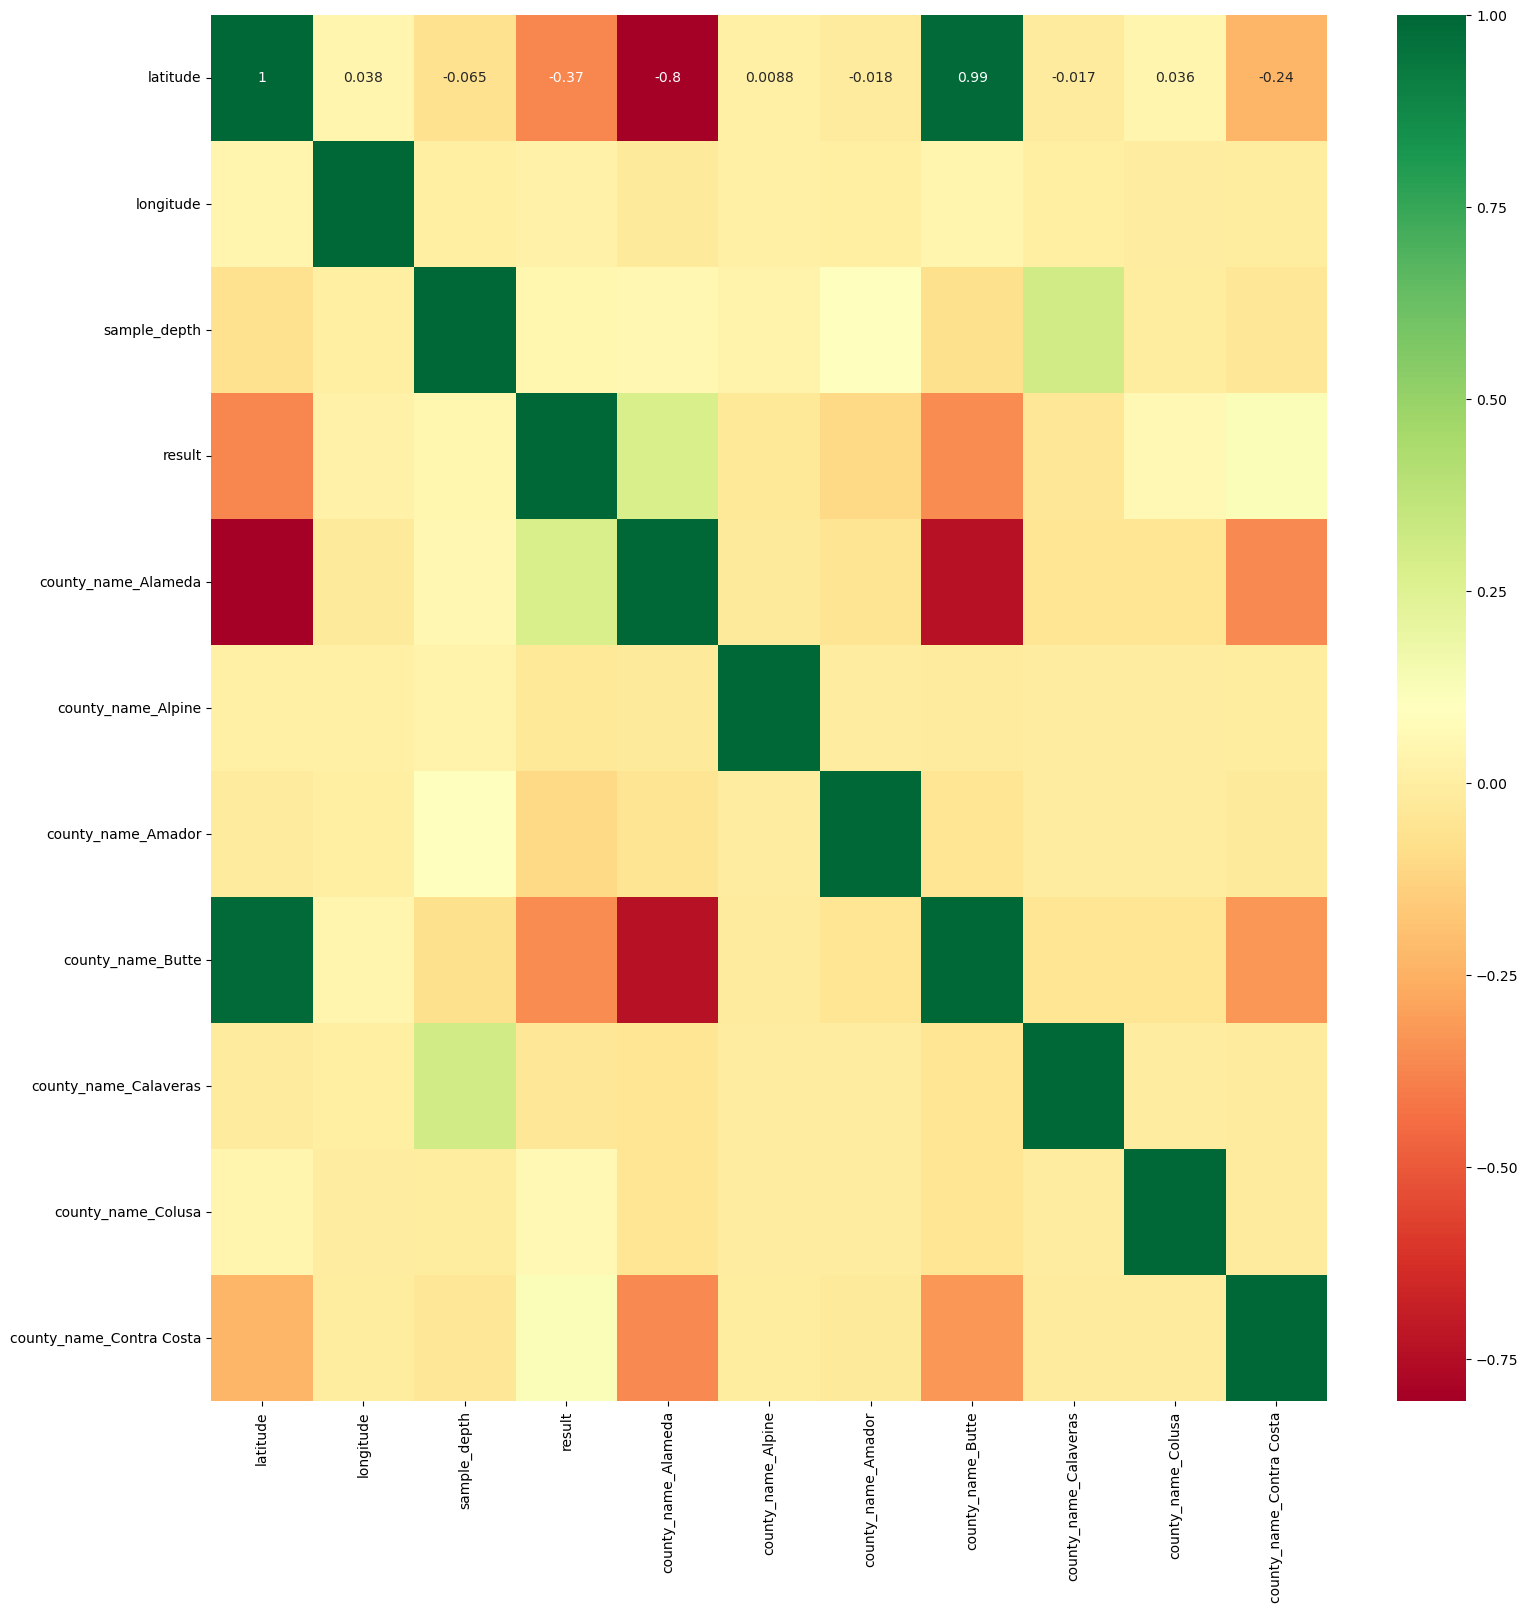

In [26]:
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [27]:
features = x.corr()['result'].sort_values()
features

latitude                   -0.373689
county_name_Butte          -0.355925
county_name_Amador         -0.102035
county_name_Calaveras      -0.040051
county_name_Alpine         -0.034866
longitude                   0.014797
sample_depth                0.047980
county_name_Colusa          0.061415
county_name_Contra Costa    0.122884
county_name_Alameda         0.275939
result                      1.000000
Name: result, dtype: float64

<Axes: >

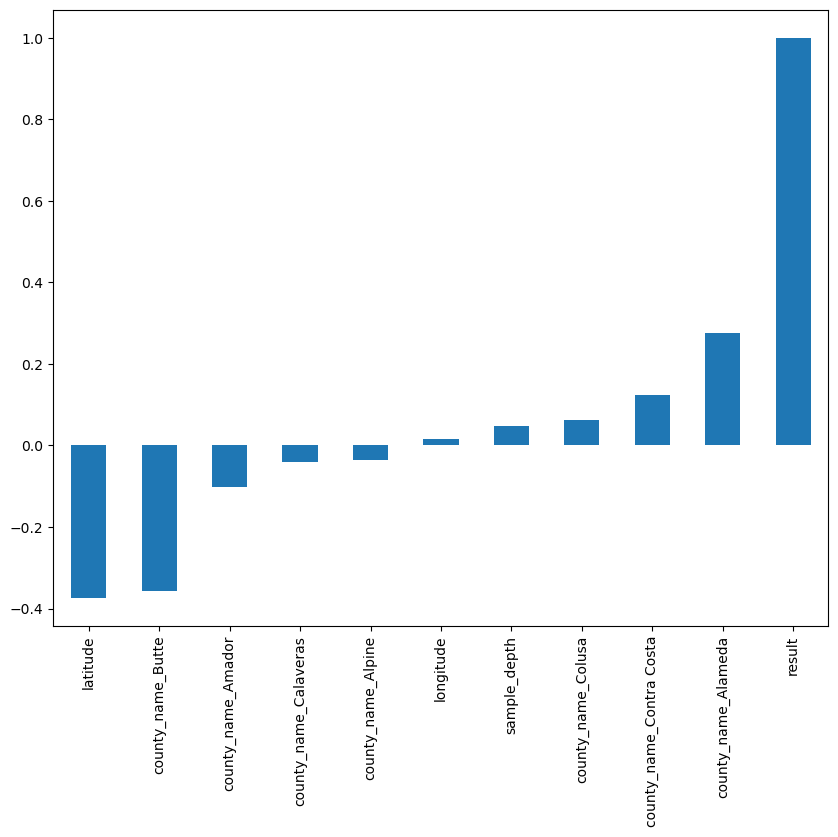

In [28]:
features.plot(kind='bar',figsize=(10,8))

### Key Findings and Insights

Throughout exploring water samples gathering by California Department of Water Resources I found many different physical parameters that affected the water quality. After utilizing data wrangling and visualization, I learned that narrowing down to the most important features allow use to focus on which features are most impactful to the quality of water. I found that filtering on the pH parameter was the most critical physhical parameter because it determines level of akalinity or acidity. 

### Three Hypothesis

1.
* Null - There is no difference do to the pH level being acidic, just random occurrence.
* Alternative - There is a difference do the pH level being acidic due to the sample depth.

2.
* Null - There is no difference do to the pH level being acidic, just random occurrence.
* Alternative - There is a difference do the pH level being acidic due to different county.

3.
* Null - There is no difference do to the pH level being acidic, just random occurrence.
* Alternative - There is a difference do the pH level being acidic due to different geo location of longitude and latitude.


### Significance test 